Let us load the dataset and seperate the explanatory varibale from the response variable

In the given dataset,explanatory variable as follows

age	(int)
height	(int)
weight	(float )
gender	(categorical code)
ap_hi	(int)
ap_lo	(int)
cholesterol	(1: normal, 2: above normal, 3: well above normal)
gluc	(1: normal, 2: above normal, 3: well above normal)
smoke	(binary)
alco	(binary)
active	(binary)

Response variable is cardio	(binary)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

dataset = pd.read_csv("../input/cardio_train.csv",sep=";")
column=["id","cardio"]
x=dataset.drop(column,axis=1)
y=dataset["cardio"]
y=y.astype(int)


['cardio_train.csv']


verify whether any null values present the dataset

In [2]:
print(dataset.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [4]:
print(dataset.head(10))
dataset.describe()

   id    age  gender  height  weight   ...    gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0   ...       1      0     0       1       0
1   1  20228       1     156    85.0   ...       1      0     0       1       1
2   2  18857       1     165    64.0   ...       1      0     0       0       1
3   3  17623       2     169    82.0   ...       1      0     0       1       1
4   4  17474       1     156    56.0   ...       1      0     0       0       0
5   8  21914       1     151    67.0   ...       2      0     0       0       0
6   9  22113       1     157    93.0   ...       1      0     0       1       0
7  12  22584       2     178    95.0   ...       3      0     0       1       1
8  13  17668       1     158    71.0   ...       1      0     0       1       0
9  14  19834       1     164    68.0   ...       1      0     0       0       0

[10 rows x 13 columns]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Analysis the dataset, predict the variable that cause more impact on the prediction value.

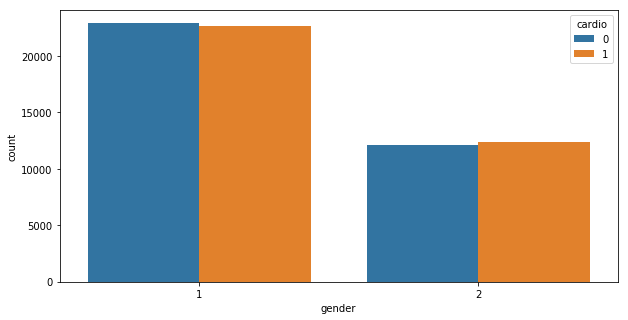

In [5]:
rcParams['figure.figsize'] = 10,5
sns.countplot(x='gender',hue='cardio',data=dataset)

In [6]:
dataset.cardio.value_counts()
diseased=(len(dataset[dataset.cardio==1])/len(dataset.cardio))*100
diseased_male=len(dataset[(dataset.cardio==1) & (dataset.gender==1)])/len(dataset.cardio)*100
diseased_female=len(dataset[(dataset.cardio==1) & (dataset.gender==2)])/len(dataset.cardio)*100

print("{:.2f}% of the total count were diseased, amoung which {:.2f}% were male and {:.2f}% were female".format(diseased,diseased_male,diseased_female))

non_diseased=(len(dataset[dataset.cardio==0])/len(dataset.cardio))*100
non_diseased_male=len(dataset[(dataset.cardio==0) & (dataset.gender==1)])/len(dataset.cardio)*100
non_diseased_female=len(dataset[(dataset.cardio==0) & (dataset.gender==2)])/len(dataset.cardio)*100
print("\n{:.2f}% of the total count were  not diseased, amoung which {:.2f}% were male and {:.2f}% were female".format(non_diseased,non_diseased_male,non_diseased_female))


49.97% of the total count were diseased, amoung which 32.31% were male and 17.66% were female

50.03% of the total count were  not diseased, amoung which 32.73% were male and 17.30% were female


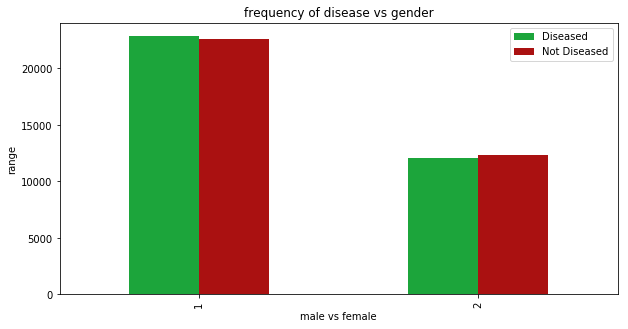

In [7]:
pd.crosstab(dataset.gender, dataset.cardio).plot(kind="bar",figsize=(10,5),color=['#1CA53B','#AA1111' ])
plt.title("frequency of disease vs gender")
plt.ylabel('range')
plt.xlabel('male vs female')
plt.legend(["Diseased","Not Diseased"])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

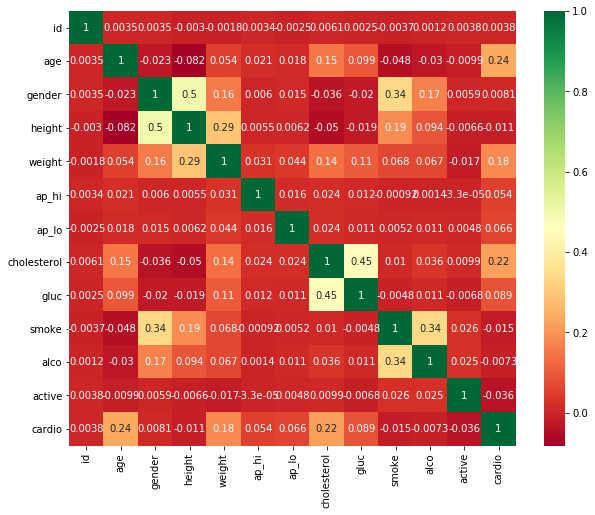

In [8]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn') 
#sns.heatmap(dataset.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


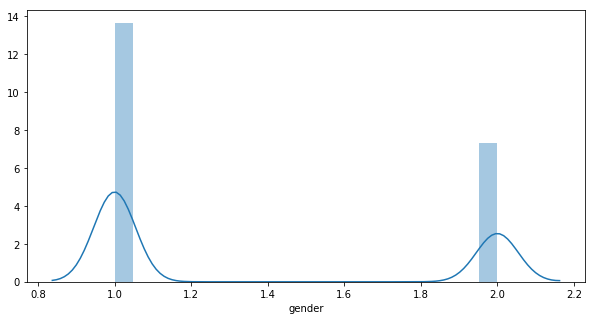

In [9]:
sns.distplot(dataset["gender"])

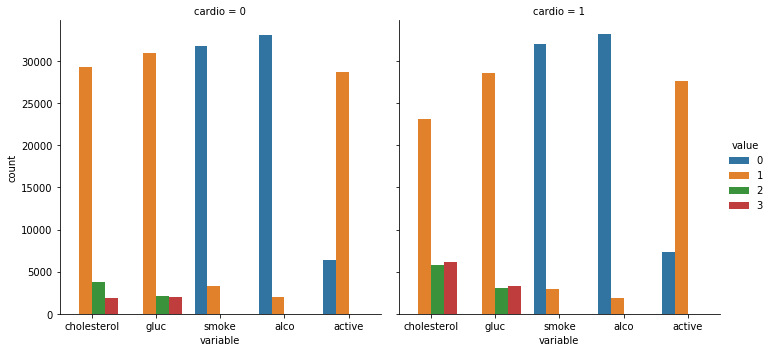

In [10]:
col=['cholesterol','gluc', 'smoke', 'alco', 'active']
data_value=pd.melt(dataset,id_vars="cardio",value_vars=dataset[col])
sns.catplot(x="variable",hue="value",col="cardio",data=data_value,kind="count")

Now let us build a suitable prediction model based on the given dataset

In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=0)

Classification using Naivebayes

In [12]:
Classifiers = list()
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(train_x,train_y)
y_pred_NB = GNB.predict(test_x)
Classifiers.append(y_pred_NB)

Classification using KNeighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x,train_y)
y_pred_KN = knn.predict(test_x)
Classifiers.append(y_pred_KN)

classification using Decision Tree 

In [14]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(train_x,train_y)
y_pred_Deci = DTR.predict(test_x)
Classifiers.append(y_pred_Deci)

Classification using Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=500,random_state=0)
RFC.fit(train_x,train_y)
y_pred_RF = RFC.predict(test_x)
Classifiers.append(y_pred_RF)

Classification using XGBoost

In [16]:
import xgboost as XGB
XGBC = XGB.XGBClassifier()
XGBC.fit(train_x,train_y)
y_pred_XGB = XGBC.predict(test_x)
Classifiers.append(y_pred_XGB)

In [17]:
Class = ['Naive Bayes' , 'KNeighbors' ,'DecisionTree', 'RandomForest' , 'XGBoost']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Classifiers)):
    if a < accuracy_score(test_y,Classifiers[pred]):
        a = accuracy_score(test_y,Classifiers[pred])
        index=pred
        
    print("accuracy of {} classifier is {:.2f}%".format(Class[pred],accuracy_score(test_y,Classifiers[pred])*100))
    
print("\nbest classifier is {} and the accuracy is {:.2f}%".format(Class[index],a*100))

accuracy of Naive Bayes classifier is 58.85%
accuracy of KNeighbors classifier is 67.91%
accuracy of DecisionTree classifier is 63.17%
accuracy of RandomForest classifier is 71.46%
accuracy of XGBoost classifier is 73.60%

best classifier is XGBoost and the accuracy is 73.60%
